In [11]:
# Import libraries
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Fetch dataset
student_performance = fetch_ucirepo(id=320)
X = student_performance.data.features
y = student_performance.data.targets


# Step 2: Preprocessing (handle categorical data)
# Combine X and y to apply label encoding if needed
data = pd.concat([X, y], axis=1)

# Encode all categorical columns (if any)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])

# Split back to X and y
X = data.drop(columns=y.columns)
y = data[y.columns[0]]  # assuming single target

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", (classification_report(y_test, y_pred, zero_division=0)))



Model Accuracy: 0.16

Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         5
           8       0.29      0.22      0.25         9
           9       0.23      0.27      0.25        11
          10       0.07      0.14      0.09        14
          11       0.12      0.16      0.14        19
          12       0.17      0.20      0.18        15
          13       0.27      0.27      0.27        15
          14       0.13      0.13      0.13        15
          15       0.20      0.11      0.14         9
          16       0.00      0.00      0.00         4
          17       1.00      0.14      0.25         7
          18       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         1

    accuracy                           0.16       130
   macro avg       0.17      0.11 

In [9]:
print(student_performance.metadata)
print(student_performance.variables)

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

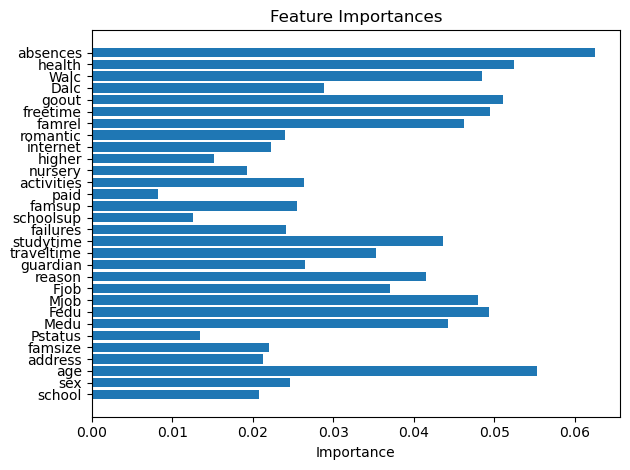

In [12]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()